In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from spectres import spectres

Load the spectral data, the first column is wavelength, second flux density and third flux density uncertainty

In [2]:
spectrum = np.loadtxt("VST-ATLAS_J025.6821-33.4627.txt")

Specify the grid of wavelengths onto which you wish to sample, note that the three examples have:

1. left hand side outside the old wavelength range;
2. right hand side outside the old wavelength range; and
3. both sides within the old wavelength range.

by default, zeros are padded when data is not available at those wavelengths.

In [3]:
# Downsample to 5 A resolution
regrid1 = np.arange(6400., 9000., 5.0)

# Downsample to 10 A resolution
regrid2 = np.arange(6750., 9500., 10.0)

# Upsample to 0.1 A resolution
regrid3 = np.arange(7000., 8000., 0.1)

Call the spectres function to resample the input spectrum or spectra to itself and the new wavelength grid

In [4]:
spec_resample0, spec_errs_resample0 =\
    spectres(spectrum[:,0], spectrum[:,0], spectrum[:,1], spec_errs=spectrum[:,2])
assert np.sum(spec_resample0) == np.sum(spectrum[:,1]), \
    "Resampling with itself (i.e. should have done nothing) does not conserve flux!"

spec_resample1, spec_errs_resample1 =\
    spectres(regrid1, spectrum[:,0], spectrum[:,1], spec_errs=spectrum[:,2])
spec_resample2, spec_errs_resample2 =\
    spectres(regrid2, spectrum[:,0], spectrum[:,1], spec_errs=spectrum[:,2], fill=-999.)
spec_resample3, spec_errs_resample3 =\
    spectres(regrid3, spectrum[:,0], spectrum[:,1], spec_errs=spectrum[:,2])


Spectres: new_wavs contains values outside the range in spec_wavs. New_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument (nan by default).



Plotting code

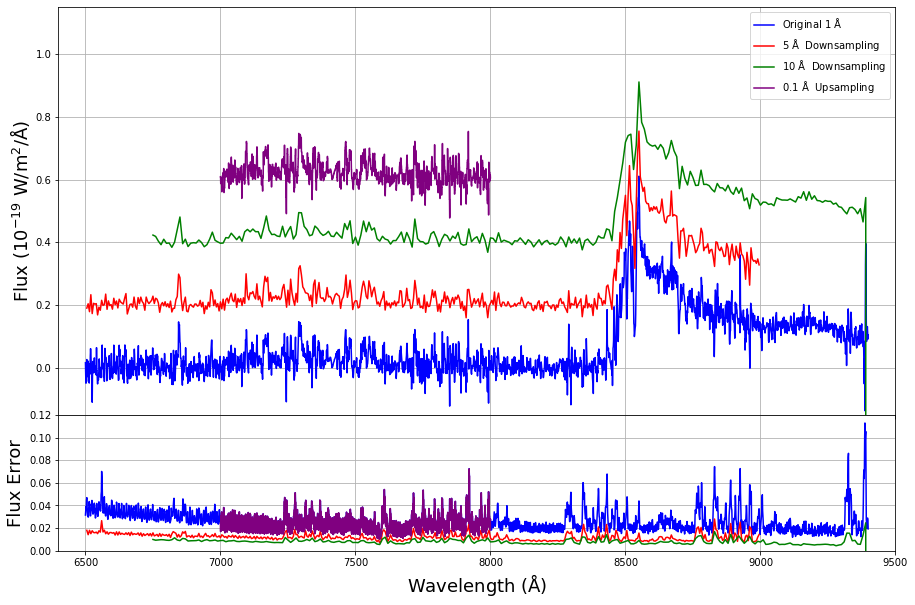

In [5]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1], hspace=0.) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.plot(spectrum[:,0], spectrum[:,1] * 1E19, color="blue", lw=1.5, label="Original 1 $\mathrm{\AA}\ $")
ax1.plot(regrid1, spec_resample1 * 1E19 + 0.2, color="red", lw=1.5, label="5 $\mathrm{\AA}\ $ Downsampling")
ax1.plot(regrid2, spec_resample2 * 1E19 + 0.4, color="green", lw=1.5, label="10 $\mathrm{\AA}\ $ Downsampling")
ax1.plot(regrid3, spec_resample3 * 1E19 + 0.6, color="purple", lw=1.5, label="0.1 $\mathrm{\AA}\ $ Upsampling")
ax1.set_ylabel("Flux ($10^{-19}\ \mathrm{W/m^2/\\AA)}$", size=18)
ax1.set_xlim(6400, 9500)
ax1.set_ylim(-0.15, 1.15)
ax1.set_xticklabels([''])
ax1.grid()
ax1.legend()


ax2.plot(spectrum[:,0], spectrum[:,2] * 1E19, color="blue", lw=1.5)
ax2.plot(regrid1, spec_errs_resample1 * 1E19, color="red", lw=1.5)
ax2.plot(regrid2, spec_errs_resample2 * 1E19, color="green", lw=1.5)
ax2.plot(regrid3, spec_errs_resample3 * 1E19, color="purple", lw=1.5)
ax2.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=18)
ax2.set_ylabel("Flux Error", size=18)
ax2.set_xlim(6400, 9500)
ax2.set_ylim(0, 0.12)
ax2.grid()